In [22]:
import numpy as np 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os


In [23]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [24]:
# The main path
path = '/home/sky/Desktop/god-classification/dataset/'

# Training directory
train_dir = os.path.join(path,'Train')
print(train_dir)

# Validation directory
val_dir = os.path.join(path,'Val')
print(val_dir)


# Creating image generator steps
train_data = ImageDataGenerator(rescale=1/255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validate_data = ImageDataGenerator(rescale=1/255)

train_generator = train_data.flow_from_directory(directory=train_dir,target_size=(412,412),batch_size=4,class_mode='categorical')
validate_generator = validate_data.flow_from_directory(directory=val_dir,target_size=(412,412),batch_size=2,class_mode='categorical')

/home/sky/Desktop/god-classification/dataset/Train
/home/sky/Desktop/god-classification/dataset/Val
Found 150 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


# Traning Generator

In [25]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validate_generator,
    validation_steps=2,
    steps_per_epoch=4)

/tmp/ipykernel_8002/905994827.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
4/4 [==============================] - 14s 3s/step - loss: 0.9413 - accuracy: 0.3125 - val_loss: 0.5915 - val_accuracy: 0.7500
Epoch 2/5
4/4 [==============================] - 15s 4s/step - loss: 0.7068 - accuracy: 0.3125 - val_loss: 0.5888 - val_accuracy: 0.7500
Epoch 3/5
4/4 [==============================] - 15s 4s/step - loss: 0.7430 - accuracy: 0.4286 - val_loss: 0.5229 - val_accuracy: 0.7500
Epoch 4/5
4/4 [==============================] - 17s 4s/step - loss: 0.7373 - accuracy: 0.4375 - val_loss: 0.5697 - val_accuracy: 0.7500
Epoch 5/5
4/4 [==============================] - 17s 5s/step - loss: 0.9253 - accuracy: 0.1875 - val_loss: 0.6125 - val_accuracy: 0.5000


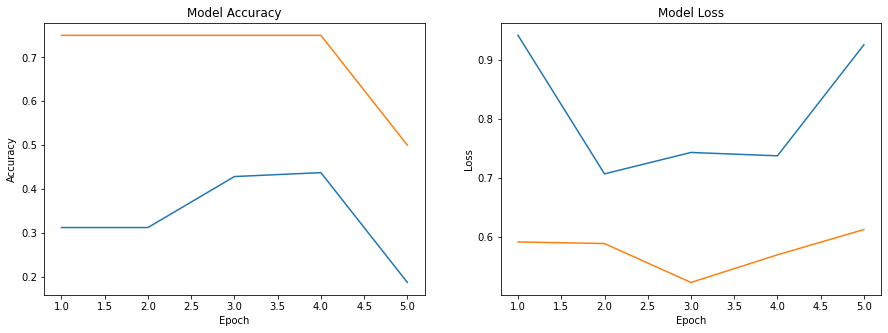

In [26]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    plt.show()

     
    
plot_model_history(history)

In [ ]:
#model.save("/home/sky/Desktop/god-classification/vgg16_model.h5")